<a href="https://colab.research.google.com/github/Eliandry/Neural-networks/blob/main/bidirectional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,GRU,Input, Dropout,Bidirectional
from keras.models import Sequential
from keras.optimizers import Adam


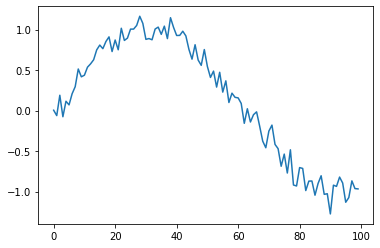

In [45]:
N=10000
data=np.array([np.sin(x/20) for x in range(N)])+ 0.1*np.random.randn(N)
plt.plot(data[:100])
plt.show()

In [39]:
off=3
len=off*2+1
X=np.array([ np.diag(np.hstack((data[i:i+off], data[i+off+1:i+len]))) for i in range(N-len)])
Y = data[off:N-off-1]
print(X.shape, Y.shape, sep='\n')

(9993, 6, 6)
(9993,)


In [49]:
model=Sequential()
model.add(Input((len-1,len-1)))
model.add(Bidirectional(GRU(2)))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 4)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='mean_squared_error',optimizer=Adam(0.01))
history=model.fit(X,Y,batch_size=32,epochs=30)

Epoch 1/30
313/313 [==============================] - 5s 5ms/step - loss: 0.0122
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0121
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0122
Epoch 4/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0119
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0121
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 8/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0119
Epoch 9/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0119
Epoch 10/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0118
Epoch 11/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 12/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0118
Epoch 13/30
313/313 [====

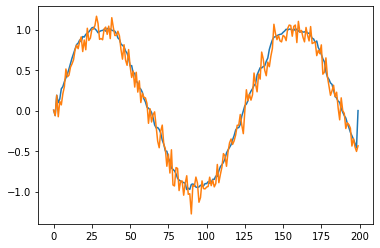

In [54]:
M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
  x = np.diag( np.hstack( (XX[i:i+off], data[i+off+1:i+len])) )
  x = np.expand_dims(x, axis=0)
  y = model.predict(x)
  XX[i+off] = y

plt.plot(XX[:M])
plt.plot(data[:M])